In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/kaggle/input/hotel-booking-demand/hotel_bookings.csv')


# **Exploratory Data Analysis (EDA):**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [24]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [25]:
data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [26]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [28]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

# **Problem Statements and their Analysis:**

1. What are the most common countries of origin for hotel guests?

In [8]:
# Print the top 10 most common countries of origin
print(data["country"].value_counts().head(10))


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


2. What is the average length of stay for guests?

In [9]:
# Calculate the average length of stay
average_stay = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]
print(average_stay.mean())


3.4279001591423066


3. What is the distribution of hotel types (city hotel vs. resort hotel)?

In [10]:
# Print the frequency of each hotel type
print(data["hotel"].value_counts())


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


4. What is the average daily rate (ADR) for each hotel type?

In [11]:
# Calculate the average ADR for each hotel type
print(data.groupby("hotel")["adr"].mean())


hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64


5. Are there any seasonal patterns in booking cancellations?

<Axes: xlabel='arrival_date_month'>

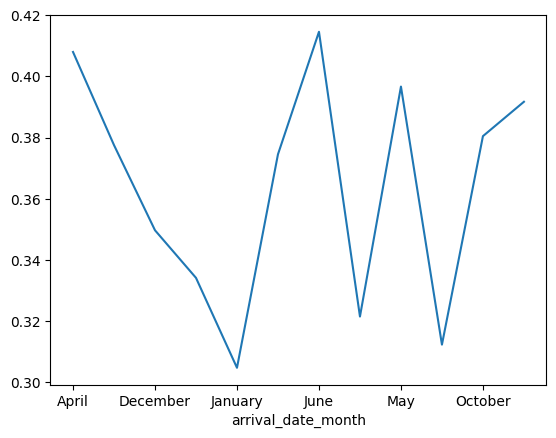

In [12]:
# Create a line plot of cancellations by month
data.groupby("arrival_date_month")["is_canceled"].mean().plot()


6. What is the correlation between lead time (time between booking and arrival) and cancellation rate?

In [13]:
# Calculate the correlation coefficient
print(data["lead_time"].corr(data["is_canceled"]))


0.293123355760716


7. What are the most common meal preferences for guests?

In [14]:
# Print the frequency of each meal preference
print(data["meal"].value_counts())


meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64


8. What is the average number of adults, children, and babies per booking?

In [15]:
# Calculate the average number of guests per booking
print(data[["adults", "children", "babies"]].mean())


adults      1.856403
children    0.103890
babies      0.007949
dtype: float64


9. What are the most popular room types?

In [16]:
# Print the frequency of each room type
print(data["reserved_room_type"].value_counts())


reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64


10.Do guests who book through travel agents have different booking patterns than those who book directly?

In [17]:
# Compare booking patterns for different booking channels
data.groupby("market_segment")[["lead_time", "stays_in_weekend_nights", "adr"]].mean()


,lead_time,stays_in_weekend_nights,adr
market_segment,,,
Aviation,4.443038,1.092827,100.142110
Complementary,13.286676,0.351279,2.886366
Corporate,22.125590,0.438338,69.358952
Direct,49.859115,0.856180,115.445175
Groups,186.973096,0.788754,79.479472
Offline TA/TO,135.004459,1.053512,87.354783
Online TA,82.998725,0.991023,117.197063
Undefined,1.500000,0.500000,15.000000


11.Which months have the highest and lowest number of bookings?

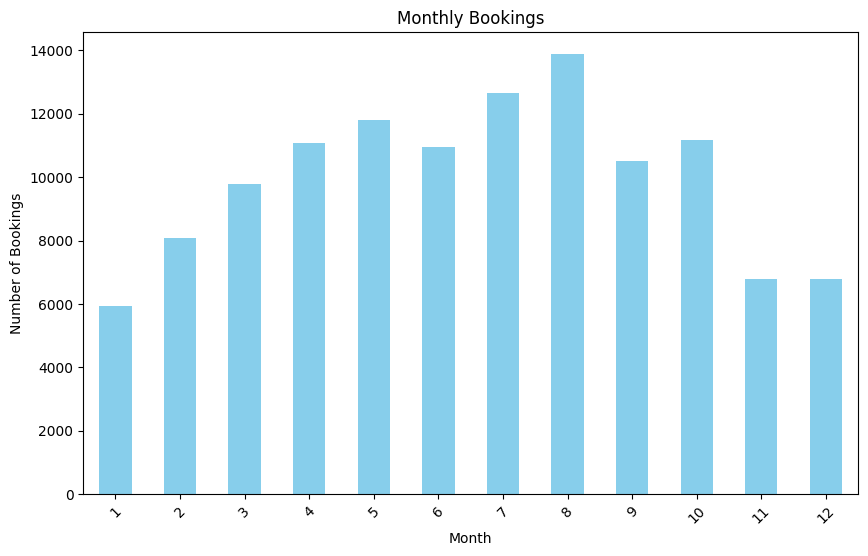

In [18]:

import matplotlib.pyplot as plt

# Extract month from the arrival date
data['arrival_date_month'] = pd.to_datetime(data['arrival_date_month'], format='%B').dt.month

# Group by month and count bookings
monthly_bookings = data.groupby('arrival_date_month')['hotel'].count()

# Plot bar chart
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Monthly Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


12.Is there a dominant booking source, or are they evenly distributed?

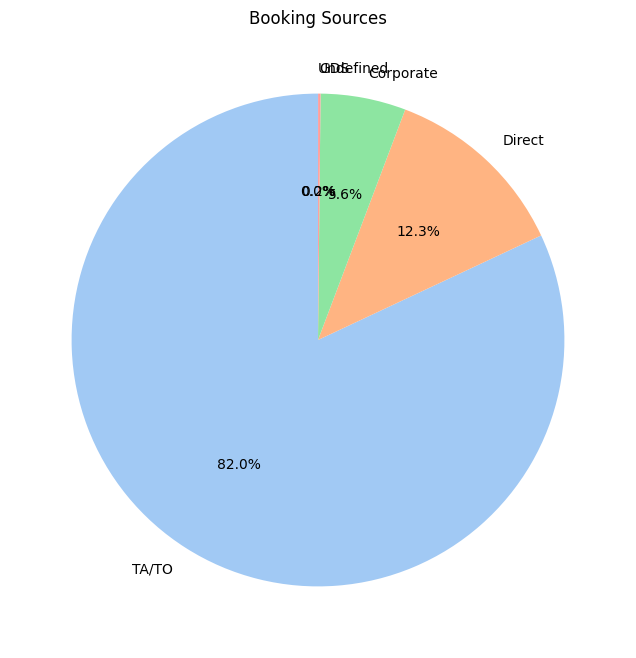

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pie chart for booking sources
plt.figure(figsize=(8, 8))
booking_sources = data['distribution_channel'].value_counts()
plt.pie(booking_sources, labels=booking_sources.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Booking Sources')
plt.show()


13.What is the distribution of different customer types (Transient, Contract, Group, etc.)?

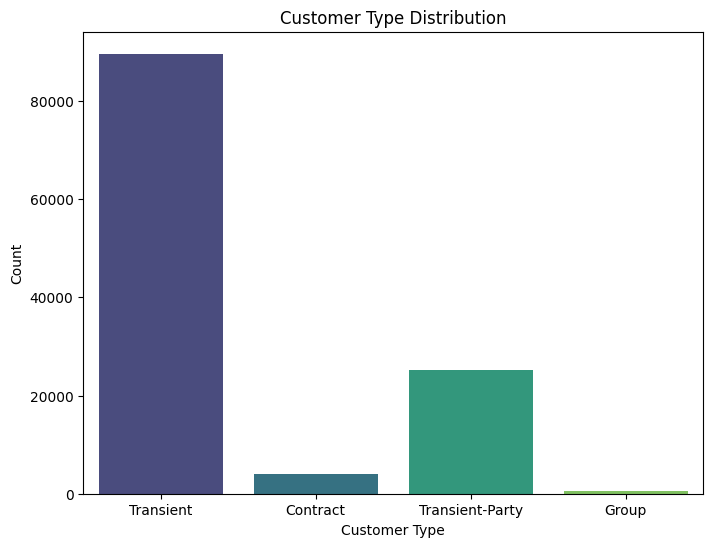

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot countplot for customer type
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_type', data=data, palette='viridis')
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


14.How is the lead time (number of days between booking and arrival) distributed for different types of hotels?

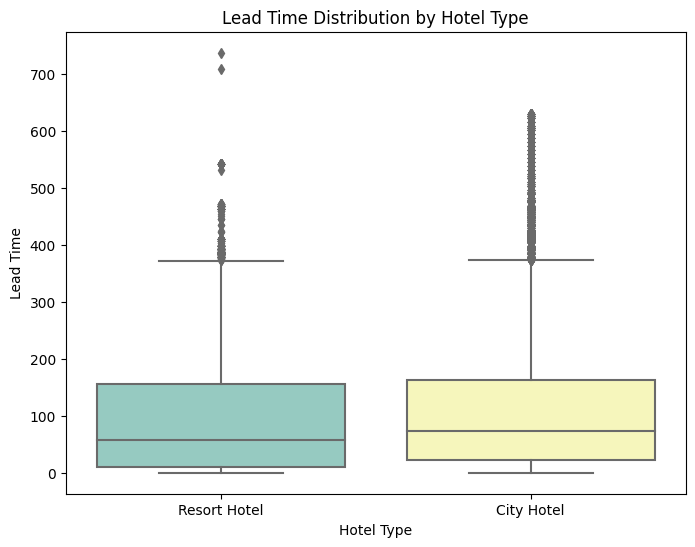

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot for lead time
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='lead_time', data=data, palette='Set3')
plt.title('Lead Time Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.show()


15.Are there specific patterns or clusters in the scatter plot that indicate potential factors influencing cancellations?

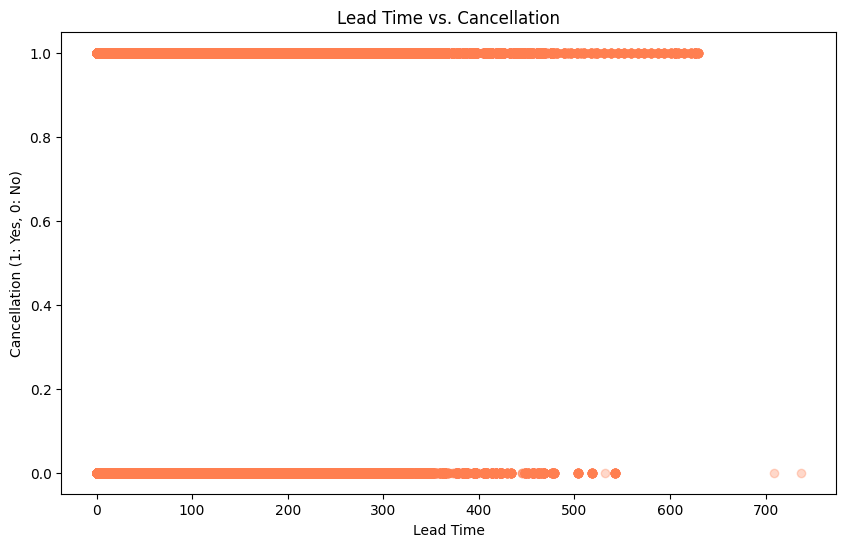

In [22]:
import matplotlib.pyplot as plt

# Plot scatter plot for bookings and cancellations
plt.figure(figsize=(10, 6))
plt.scatter(data['lead_time'], data['is_canceled'], alpha=0.3, color='coral')
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation (1: Yes, 0: No)')
plt.show()


# **Storytelling on the analysis:**

The dataset used for the analysis is of hotel booking demand.The goal of the analysis is to uncover the hidden patterns and factual information from the dataset to get a better understanding and extract meaningful insights from it.

**Key attributes**:
* hotel                                  
* is_canceled                            
* lead_time                              
* arrival_date_year                      
* arrival_date_month                     
* arrival_date_week_number               
* arrival_date_day_of_month              
* stays_in_weekend_nights                
* stays_in_week_nights                   
* adults                                 
* children                               
* babies                                 
* meal                                   
* country                              
* market_segment                         
* distribution_channel                   
* is_repeated_guest                      
* previous_cancellations                 
* previous_bookings_not_canceled         
* reserved_room_type                     
* assigned_room_type                     
* booking_changes                        
* deposit_type                           
* agent                              
* company                           
* days_in_waiting_list                   
* customer_type                          
* adr                                    
* required_car_parking_spaces            
* total_of_special_requests              
* reservation_status                     
* reservation_status_date                


# **Insights:**


1. August attracts highest number of bookings on the contrary january has lowest number of bookings.
1. The transient customer type has the most visitings.
1. The lead time versus the cancellation scatter plot shows olots for booking and cancellation.
1. The TA/TO is the most dominant booking source.
1. The boxplot unveils a captivating diversity in lead times, painting a vibrant portrait of booking behaviors for distinct hotel types.
1. The average stay in the hotels was approximately 4 days.